In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
sys.path.insert(0, "../../code-previous")

In [3]:
import pandas as pd
import numpy as np
import networkx as nx
import sklearn.feature_extraction as skfeatures
import time
import os

import operator

import string
import swifter
import nltk
stopwords = nltk.corpus.stopwords.words('english')


import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='sreejith_s', api_key='rcet0rTqFCc3WeOzWTjv')



from sklearn.feature_extraction.text import CountVectorizer


from unicodedata import category
from tqdm import tqdm
tqdm.pandas(desc="Progress")

import seaborn as sns
sns.set_style('white')
import matplotlib.pylab as plt

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [4]:
data_path = "/mnt/disks/vault/analysis-data/interdisciplinary-novelty-analysis/all_discipline_data.pql"

#data_path = "/mnt/disks/vault/analysis-data/interdisciplinary-novelty-analysis/physics.pql"
data = pd.read_pickle(data_path)

In [5]:
data.columns

Index(['ArticleID', 'Type', 'Label', 'PubYear', 'Doctypes', 'Title', 'Journal',
       'Journal Abbreviation ISO', 'title_without_stopwords'],
      dtype='object')

In [6]:
physics_labels = ['Physics, Applied',
                  'Physics, Fluids & Plasmas',
                  'Physics, Atomic, Molecular & Chemical',
                  'Physics, Multidisciplinary',
                  'Physics, Condensed Matter',
                  'Physics, Nuclear',
                  'Physics, Particles & Fields',
                  'Physics, Mathematical']

In [7]:
physics_data = data[data["Label"].isin(physics_labels)]
article_df = None

In [8]:
#physics_applied_phy = physics_data[physics_data.Label == "Physics, Nuclear"]
physics_applied_phy = physics_data.sort_values(by="PubYear")
vectorizer1 = CountVectorizer()
vectorized_words1 = vectorizer1.fit_transform(physics_applied_phy.title_without_stopwords)

In [9]:
row_counts = physics_applied_phy.groupby('PubYear').size().reset_index(name="count")
counts =  list(row_counts["count"])

In [10]:
N = 200

vocab = vectorizer1.vocabulary_
rev_vocab = {index:word for word,index in vocab.items()}
# Highest Frequency words all time
all_time_word_frequencies = vectorized_words1.sum(axis=0).reshape(-1,).tolist()[0]
word_index_with_freq = {index:freq for index,freq in enumerate(all_time_word_frequencies)}

word_with_freq = {rev_vocab[index]:np.log(freq + 1) for index, freq in word_index_with_freq.items()}

sorted_word_with_freq = sorted(word_with_freq.items(), key=operator.itemgetter(1), reverse=True)

In [11]:
start = 250
end = 300
top_words_all_corpus = pd.DataFrame(list(sorted_word_with_freq[start:end]), columns=["word","frequency"])

In [12]:
# list(top_words_all_corpus["word"])

## laser, electron, quantum, carbon, nanoparticles, 
## semiconductor, spectroscopy, superconducting 

vocab["string"]

237610

In [13]:
list(top_words_all_corpus["word"])

['charged',
 'vibrational',
 'strong',
 'tunneling',
 'simple',
 'discharge',
 'matter',
 'microscopy',
 'fluid',
 'iron',
 'metals',
 'comparison',
 'technique',
 'nanotubes',
 'pulse',
 'response',
 'generalized',
 'pulsed',
 'motion',
 'design',
 'ni',
 'atom',
 'quasi',
 'shell',
 'role',
 'classical',
 'compounds',
 'data',
 'modeling',
 'functional',
 'conditions',
 'spectral',
 'rate',
 '100',
 'source',
 'multiple',
 'semiconductors',
 'highly',
 'quark',
 'scale',
 'al',
 'fabrication',
 'superconductors',
 'clusters',
 'line',
 'group',
 'devices',
 'gas',
 'instability',
 'epitaxial']

In [14]:
row_counts = physics_applied_phy.groupby('PubYear').size().reset_index(name="count")
counts =  list(row_counts["count"])

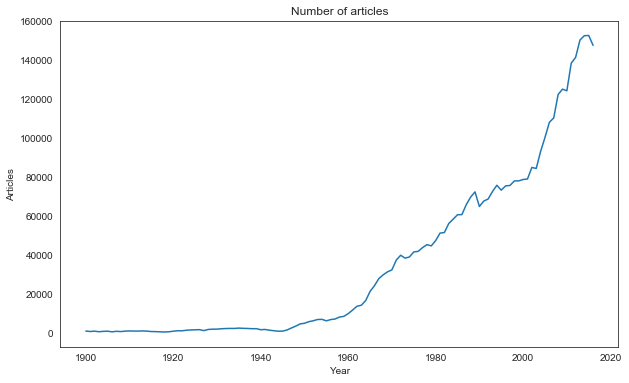

In [15]:
f = plt.figure(figsize=(10,6))

years = list(range(1900,2017))

ax = f.add_subplot(111)
ax.set_xlabel("Year")
ax.set_ylabel("Articles")
ax.set_title("Number of articles")
ax.plot(years,counts)


In [16]:
#words = ['laser', 'electron', 'quantum', 'carbon', 'nanoparticles', 
#         'semiconductor', 'spectroscopy', 'superconducting']

words = ['superconductivity','transistors','ferroelectricity','diffraction','quark','string']

frequencies = []

for word in words:
    word_index = vocab[word]
    yearly_freq_for_word = []
    index_start = 0
    
    for i in range(len(row_counts)):
        offset = index_start + counts[i]
        tmp = vectorized_words1[index_start:offset,:]
        yearly_word_freq = tmp.sum(axis=0).reshape(-1,).tolist()[0][word_index]
        
        ## Normalizing - Divide by number of physics articles in the year
        _tmp = float(yearly_word_freq) / counts[i]
        
        yearly_freq_for_word.append(_tmp)
        index_start = offset
    
    frequencies.append(yearly_freq_for_word)

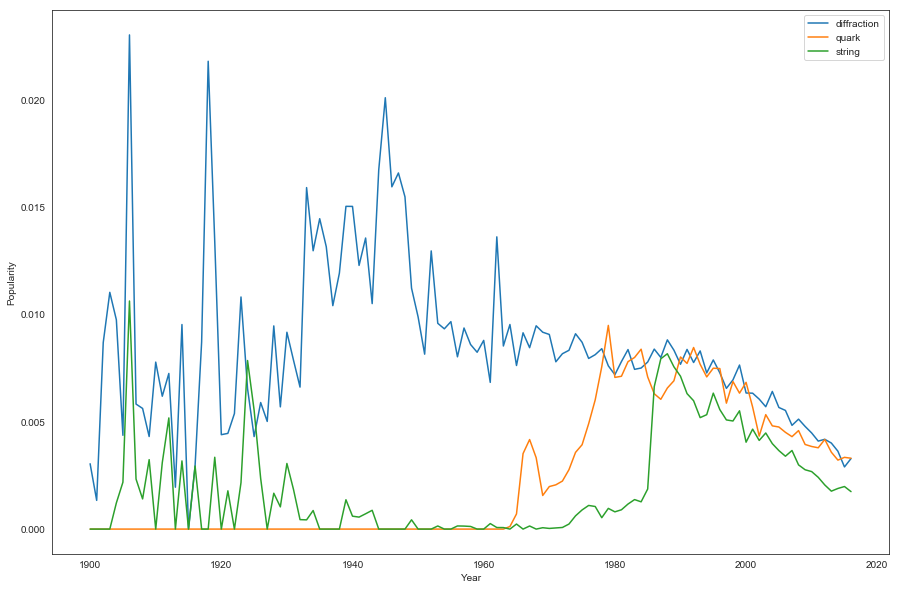

In [19]:
f = plt.figure(figsize=(15,10))

years = list(range(1900,2017))

ax = f.add_subplot(111)
#ax.plot(years,frequencies[0], label=words[0])
#ax.plot(years,frequencies[1], label=words[1])
#ax.plot(years,frequencies[2], label=words[2])
ax.plot(years,frequencies[3], label=words[3])
ax.plot(years,frequencies[4], label=words[4])
ax.plot(years,frequencies[5], label=words[5])
#ax.plot(years,frequencies[6], label=words[6])
#ax.plot(years,frequencies[7], label=words[7])
ax.set_xlabel("Year")
ax.set_ylabel("Popularity")

ax.legend()

In [18]:
years = list(range(1900,2017))


datatoplot = [go.Scatter(
            x=years,
            y=frequencies[1],
            mode = 'lines+markers',
            name=words[1],
            marker=dict(
                color='#228B22'
            )
    ),go.Scatter(
            x=years,
            y=frequencies[4],
            mode = 'lines+markers',
            name=words[4],
            marker=dict(
                color='#000080'
            )
    ),go.Scatter(
            x=years,
            y=frequencies[5],
            mode = 'lines+markers',
            name=words[5],
    marker=dict(
                color='#FFA500'
            )
    )]



layout = go.Layout(
    title='Word Propagation',
    
    xaxis=dict(
        title='Year',
        titlefont=dict(
            family='Lato',
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Popularity Ratio',
        titlefont=dict(
            family='Lato',
            color='#7f7f7f'
        )
    )
)

fig1 = go.Figure(data=datatoplot, layout=layout)
py.iplot(fig1, filename='freq')

/usr/local/lib/python3.6/dist-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead

